# Linear Regression

Step 1, import the things we probably always want

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

These ones are not for always, but I like this plotting style for this workbook

In [2]:
import matplotlib
matplotlib.style.use('ggplot')

Let's take this set

X has values 5,7,9,11,13,15

y has 11,14,20,24,29,31

and we want to build a model
$\hat{y} = w_0 + w_1x$

In [3]:
X = np.array([5, 7, 9, 11, 13, 15])
y = np.array([11, 14, 20, 24, 29, 31])

Let's plot it to see if a linear model makes sense for this

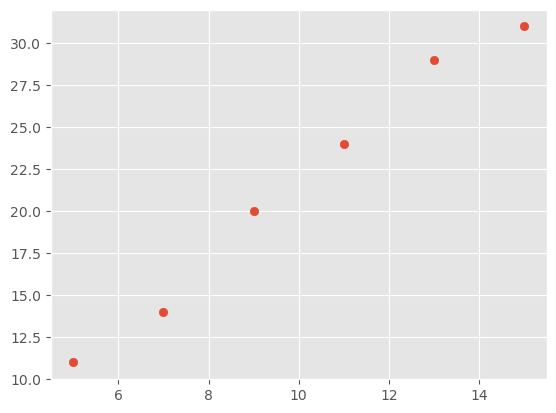

In [4]:
plt.scatter(X,y)
plt.show()

We can check the correlation coefficient 

In [5]:
np.corrcoef(X, y)

array([[1.        , 0.99322298],
       [0.99322298, 1.        ]])

0.99322, very high correlation!

## Data Structure: let's look at X and y in more detail

In [6]:
y.shape

(6,)

In [7]:
y.ndim

1

y is clearly a 1d array, as expected - good

In [8]:
X.shape

(6,)

In [9]:
X.ndim

1

X is also a 1d array, not good. It needs to be a 2d array

In [10]:
X

array([ 5,  7,  9, 11, 13, 15])

It's written as one row, but really we need 6 rows with one entry in each row. Let's reshape the array

In [11]:
X = X.reshape(-1,1)

In [12]:
X.shape

(6, 1)

In [13]:
X.ndim

2

2d array. Good. Let's look at it

In [14]:
X

array([[ 5],
       [ 7],
       [ 9],
       [11],
       [13],
       [15]])

6 rows now

## Section 3, build the model

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
LinearRegression?

Init signature:
LinearRegression(
    *,
    fit_intercept=True,
    normalize='deprecated',
    copy_X=True,
    n_jobs=None,
    positive=False,
)
Docstring:     
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

normalize : bool, default=False
    This parameter is ignored when ``fit_intercept`` is set to False.
    If True, the regressors X will be normalized before regression by
    subtracting the mean and dividing by the l2-norm.
    If you wish to standardize, please use
    :class:`~sklearn.preprocessing.StandardScaler` before calling ``fit``
    on an estim

Create the model, with sklearn you initialise the model with an "empty constructor" of the base form of the model. LinearRegression is the constructor

In [17]:
model = LinearRegression()

Now "fit" the model using X and y. Use an appropriate ? after method name to see. .fit expects the X part to be a matrix, but we have a 1 dimensional array. Pay attention to the error message when you just do x,y

In [18]:
model.fit(X,y)

LinearRegression()

## Section 4 Inferences

In [19]:
model.coef_

array([2.12857143])

In [20]:
model.intercept_

0.2142857142857153

There are the parameters

$\hat{y} = 0.2142857142857153 + 2.12857143 x$

is the model

In [21]:
w0 = model.intercept_
w1 = model.coef_[0]

In [22]:
predictions = w0 + np.dot(w1,X).reshape(1,-1)

In [23]:
predictions

array([[10.85714286, 15.11428571, 19.37142857, 23.62857143, 27.88571429,
        32.14285714]])

Using the built in .predict

In [24]:
pred = model.predict(X)

In [25]:
pred

array([10.85714286, 15.11428571, 19.37142857, 23.62857143, 27.88571429,
       32.14285714])

In [26]:
pred == predictions

array([[ True,  True,  True,  True,  True,  True]])

They're the same.

## Section 5 Evaluation

In [27]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
#from sklearn.metrics import root_mean_squared_error as rms

I had to comment out rms on my ATU laptop as sklearn is not up to date - it might work for you do so try uncommenting

In [28]:
mse(y,pred)

0.723809523809522

In [29]:
r2(y,pred)

0.9864918906909576

Very close to 1!

In [30]:
#rms(y,pred)

In [31]:
rmse = np.sqrt(mse(y,pred))

In [32]:
rmse

0.8507699593953244

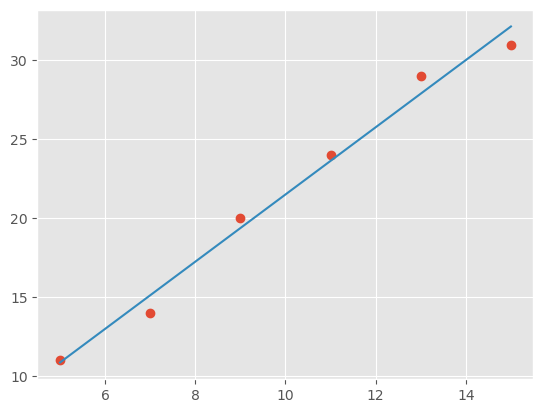

In [33]:
plt.plot(X,y,'o')
plt.plot(X,pred)
plt.show()

shows the line of best fit

In [34]:
model.score(X,y)

0.9864918906909576

Agrees with the r2 from above

## Simple linear regression with automobile data
We will now use sklearn to to predict automobile milesage per gallon (mpg) and evaluate these predictions. We first load the data and split them into a training set and a testing set.

In [35]:
#load mtcars
dfcars=pd.read_csv("mtcars.csv")
dfcars=dfcars.rename(columns={"Unnamed: 0":"name"})
dfcars.head()

FileNotFoundError: [Errno 2] No such file or directory: 'mtcars.csv'

We need to choose the variables that we think will be good predictors for the dependent variable `mpg`. 

>**EXERCISE:**  Pick one variable to use as a predictor for simple linear regression.  Create a markdown cell below and discuss your reasons.  You may want to justify this with some visualizations.  Is there a second variable you'd like to use as well, say for multiple linear regression with two predictors?

In [95]:
#your code (if any) here

> **EXERCISE:** With sklearn fit the training data using simple linear regression. 

> Plot the data and the prediction.  

>Print out the mean squared error for the set

In [96]:
#your code here
#define  predictor and response for set




In [97]:
#your code here
# create linear regression object with sklearn


#your code here
# train the model and make predictions


#your code here
#print out coefficients



In [98]:
# your code here
# Plot outputs


# Diabetes Dataset - Multiple linear regression 

Now we are going to fit the training data (from the diabetes dataset built into sklearn) using multiple linear regression with multiple predictors. 

In [ ]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

In [ ]:
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
data.boxplot(rot=90)
data.head()

Above I put the data into a pandas dataframe and then tried to visualise it. You will notice all of the data is in a similar range

### Normalised data
They all have a mean of 0 and standard deviation of 1. This is called Normalising the data and is a common step that I'll get into later on.

The obvious one you'll notice is the sex variable. This has two options which are 0.050680 or -0.044642, when usually with 2 options we would go with 0 and 1. The numbers were changed due to this normalisation

In [101]:
X = data 
y = diabetes.target

In [102]:
lr = LinearRegression()

In [ ]:
lr.fit(X,y)

In [ ]:
r_squared = lr.score(X,y)
r_squared

Let's do a slightly different r2

In [ ]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
adjusted_r_squared

In [ ]:
lr.coef_

In [ ]:
lr.intercept_

In [ ]:
coef=pd.Series(lr.coef_ , index=diabetes.feature_names)
coef.plot(kind='bar', color = list('rgbkymc'))
plt.ylabel('Coefficient')

Some of those coefficients are very large, and it looks like age does not contribute as much as the others

The very large coefficients can often be problematic so we'll have to think about this one again later

Maybe removing age will give us a better model

We don't really have enough knowledge to figure it out. It's possible you would get a better model without age, s3, s4 and s6